## `geom_curve()`

Arguments:

* `curvature`
A numeric value that indicates the amount of curvature. Negative values produce left-hand curves, positive values produce right-hand curves and zero produces a straight line. Default = 0.5.

* `angle`
A numeric value between 0 and 180 that indicates the amount by which the control points of the curve should be skewed. Values less than 90 skew the curve towards the start point and values greater than 90 skew the curve towards the end point. Default = 90.

* `ncp` 
The number of control points used to draw the curve. More control points produce a smoother curve. Default = 5.

In [1]:
from lets_plot import *


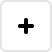
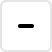
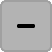
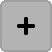
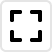
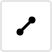
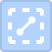
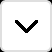
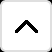
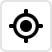
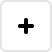
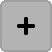
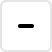
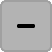
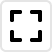
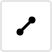
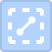
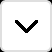
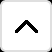
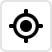

In [2]:
LetsPlot.setup_html()

In [3]:
LetsPlot.set_theme(theme_grey())

In [4]:
DEF_ANGLE = 90.0
DEF_CURVATURE = 0.5
DEF_NCP = 5

def curve_plot(curvature=DEF_CURVATURE, angle=DEF_ANGLE, ncp=DEF_NCP):
    return ggplot() \
            + geom_point(aes('x', 'y'), data = { 'x': [-30, 30], 'y': [-10,10] }) \
            + geom_curve(x = -20, y = 1, xend = 10, yend = -1, 
                         curvature = curvature, angle = angle, ncp = ncp,
                         arrow=arrow(ends='both')) \
            + ggtitle("curvature={0}, angle={1}, ncp={2}".format(curvature, angle, ncp))

def curves(curvature=DEF_CURVATURE, angle=DEF_ANGLE, ncp=DEF_NCP):
    return gggrid([
        curve_plot(curvature=curvature, angle=angle, ncp=ncp),
        curve_plot(curvature=curvature, angle=-angle, ncp=ncp),
        curve_plot(curvature=-curvature, angle=angle, ncp=ncp),
        curve_plot(curvature=-curvature, angle=-angle, ncp=ncp)
    ], ncol = 2)

In [5]:
# straight line

curve_plot(curvature=0)

In [6]:
# straight line

gggrid([
    curve_plot(angle=0),
    curve_plot(angle=180)
])

In [7]:
gggrid([
    curve_plot(curvature=0.5, ncp=1),
    curve_plot(curvature=-0.5, ncp=1),
    curve_plot(curvature=0.5),
    curve_plot(curvature=-0.5)    
], ncol=2)

In [8]:
gggrid([
    curve_plot(curvature=1, ncp=1),
    curve_plot(curvature=-1, ncp=1),
    curve_plot(curvature=1),
    curve_plot(curvature=-1)
], ncol=2)

In [9]:
# angle: negative
# -30 == 150
# -240 == 120

gggrid([
    curve_plot(angle=-30), curve_plot(angle=150),
    curve_plot(angle=-240), curve_plot(angle=120),
], ncol=2)

In [10]:
# 45 == -315 == 405
gggrid([
    curve_plot(angle=45),
    curve_plot(angle=405),
    curve_plot(angle=-315)
])

In [11]:
curves(curvature=0.9, angle=45)

In [12]:
curves(curvature=1.3, angle=135)

#### Aesthetics to Adjust Start/End :
`size_start,start_end` and `stroke_start,stroke_end`

If a curve is used in combination with a point layer, objects may overlap.
To avoid this, aesthetics for indenting the start/end coordinates according to the point size have been introduced: 

In [13]:
x = [-1, 0, 1]
y = [-1, 1, -1]
shape = [1, 16, 21]
size = [1, 2, 3]
stroke = [1, 0, 2]

x_end = x[1:] + [x[0]]
y_end = y[1:] + [y[0]]

data = {
    'x': x,
    'y': y,
    'shape': shape,
    'size': size,
    'stroke': stroke,
    'x_end': x_end,
    'y_end': y_end
}


plot = ggplot(data, aes('x','y')) \
    + geom_point(aes(size='size', shape='shape', stroke='stroke'), color='#4575b4', fill='#abd9e9') \
    + scale_size(range=[20,30], guide='none') \
    + scale_stroke(range=[0,10], guide='none') \
    + scale_shape_identity() \
    + lims(x=[-1.5, 1.5], y=[-1.5, 1.5])


plot + geom_curve(aes(xend='x_end', yend='y_end'),
                  curvature=-0.2,
                  arrow=arrow(ends='both')) 

In [14]:
# Set padding using new aestetics 

size_end = size[1:] + [size[0]]
stroke_end = stroke[1:] + [stroke[0]]

data.update({
    'size_end': size_end,
    'stroke_end': stroke_end,
})

plot + geom_curve(aes(xend='x_end', yend='y_end', 
                      size_start='size', size_end='size_end',
                      stroke_start='stroke', stroke_end='stroke_end'),
                  curvature=-0.2,
                  arrow=arrow(ends='both'))

In [15]:
plot + geom_curve(aes(xend='x_end', yend='y_end', 
                  size_start='size', size_end='size_end',
                  stroke_start='stroke', stroke_end='stroke_end'),
                  arrow=arrow(type='open', ends='both', length=15, angle=15),
                  curvature=-0.2, angle=90)

In [16]:
# More examples

def curve(curvature, angle):
    return ggplot() + \
        geom_point(x=0, y=0, size=12, alpha=0.5, color="red") + \
        geom_curve(x=0, y=-0.5, xend=0, yend=0, 
                   size=1, 
                   size_end=12, 
                   curvature=curvature, angle=angle,
                   arrow=arrow(ends='last')) + \
       ylim(-0.5, 0.1)

(gggrid([
    curve(0.5, 90),curve(-0.5, 30),
    curve(1.2,-20),curve(-1.2, 80),
    curve(0.9,-20),curve(-0.9, 5)],
    ncol=2))    

#### Livemap

In [17]:
import pandas as pd

def set_stay_time(data):
    current_moves = moves_df[(moves_df.departure == data['name'])|(moves_df.arrival == data['name'])]
    years = current_moves.year.sort_values().unique()
    years_combined = []
    for year in years:
        if len(years_combined) == 0 or years_combined[-1][1] + 1 != year:
            years_combined.append((year, year))
        else:
            years_combined[-1] = (years_combined[-1][0], year)
    years_combined = [str(year_from) if year_from == year_to else '{0}-{1}'.format(year_from, year_to) \
                      for year_from, year_to in years_combined]
    data['years'] = ', '.join(years_combined)
    return data

places_df = pd.read_csv('https://raw.githubusercontent.com/JetBrains/lets-plot-docs/master/data/pushkin/places.csv')
moves_df = pd.read_csv('https://raw.githubusercontent.com/JetBrains/lets-plot-docs/master/data/pushkin/moves.csv')
df = moves_df.merge(places_df, left_on='departure', right_on='name')\
             .rename(columns=dict(longitude='from_lon', latitude='from_lat'))\
             .drop(columns=['name'])\
             .merge(places_df, left_on='arrival', right_on='name')\
             .rename(columns=dict(longitude='to_lon', latitude='to_lat'))\
             .drop(columns=['name'])
places_df['years'] = ''
places_df = places_df.apply(set_stay_time, axis=1)
places_df.head(3)

,name,latitude,longitude,years
0,Erzurum,39.908610,41.276940,1829
1,Boldino,55.004477,45.308850,"1830, 1833"
2,Vitebsk,55.187222,30.205116,"1820, 1824"


In [18]:
ggplot() + \
    geom_livemap(const_size_zoomin=3) + \
    geom_curve(aes(x='from_lon', y='from_lat', xend='to_lon', yend='to_lat', color='path'), data=df,
                 size_start=3, size_end=3,
                 tooltips=layer_tooltips().title("Trip").line("@path"),
                 curvature=0.2,
                 arrow=arrow(type='open', length=4), size=0.5) + \
    geom_point(aes(x='longitude', y='latitude'), data=places_df, size=3, color='light_grey',
               tooltips=layer_tooltips().title('@name').line('visited in|@years')) + \
    geom_point(aes(x='longitude', y='latitude'), data=places_df, size=1.7, color='black',
               tooltips='none') + \
    scale_color_manual(name='trip name', values=['#addd8e', '#e34a33', '#8856a7', '#2c7fb8',
                                                 '#1c9099', '#006d2c', '#fec44f', '#636363']) + \
    coord_cartesian(xlim=[26, 58], ylim=[38, 62]) + \
    ggtitle("Alexander Pushkin's Trips") + \
    ggsize(800, 600) + \
    theme(axis_title='blank', axis_text='blank', axis_ticks='blank', axis_line='blank')

In [19]:
msk = places_df.loc[places_df['name'] == 'Moscow'].iloc[0]
pointSize = 2

def fromPoint(onMap: bool):
    p = ggplot(places_df, aes(x='longitude', y='latitude'))
    if (onMap):
        p += geom_livemap()
    p += geom_point(size=pointSize, color='red')
    p += geom_curve(xend=msk['longitude'], yend=msk['latitude'],
                    size=0.2,
                    size_start=pointSize, size_end=pointSize)
    return p

fromPoint(True)

In [20]:
fromPoint(False)